In [1]:
# Import packages for numeric operations and working with structured data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q:sqldf(q,globals())

# Import packages for unsupervised learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

import warnings 
warnings.filterwarnings('ignore')

In [2]:
games_df = pd.read_csv('vgsales.csv')
games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
games_df.shape

(16598, 11)

In [4]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
games_df.isnull().sum() 

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
games_df.dropna(inplace=True)

In [7]:
games_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [8]:
games_df.duplicated().sum() 
##calculate the sum of duplicated data

0

In [9]:
games_df.shape
## show the number of row and col for data set

(16291, 11)

In [10]:
games_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [11]:
##Check the data for duplicate observations
games_df_dup = games_df.duplicated().sum()
print(f'The number of duplicate observations is {games_df_dup}')

##Check for games which may have duplicated 'Name'
games_name_dup = games_df.duplicated(subset = 'Name')
games_df[games_name_dup].head(10)

The number of duplicate observations is 0


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
37,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
55,56,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,4.99,3.69,0.38,1.63,10.69
56,57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
59,60,Super Mario 64,DS,2004.0,Platform,Nintendo,5.08,3.11,1.25,0.98,10.42
67,68,Call of Duty: Ghosts,PS3,2013.0,Shooter,Activision,4.09,3.73,0.38,1.38,9.59
101,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.52,2.09,0.01,0.67,7.30


In [12]:
##Inspect the number of unique values for categorical variable
games_df_catcount = games_df.select_dtypes(include=['object']).nunique().head()
games_df_catcount

Name         11325
Platform        31
Genre           12
Publisher      576
dtype: int64

### Ununiform data

In [13]:
query = ''' SELECT distinct "Platform" FROM games_df;'''
pysqldf(query)

,Platform
0,Wii
1,NES
2,GB
3,DS
4,X360
5,PS3
6,PS2
7,SNES
8,GBA
9,3DS


## Project

In [14]:
##Grouping data by Genre to calculate total global sales for each genre
genre_sales = games_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genre_sales

Genre
Action          1722.84
Sports          1309.24
Shooter         1026.20
Role-Playing     923.83
Platform         829.13
Misc             789.87
Racing           726.76
Fighting         444.05
Simulation       389.98
Puzzle           242.21
Adventure        234.59
Strategy         173.27
Name: Global_Sales, dtype: float64

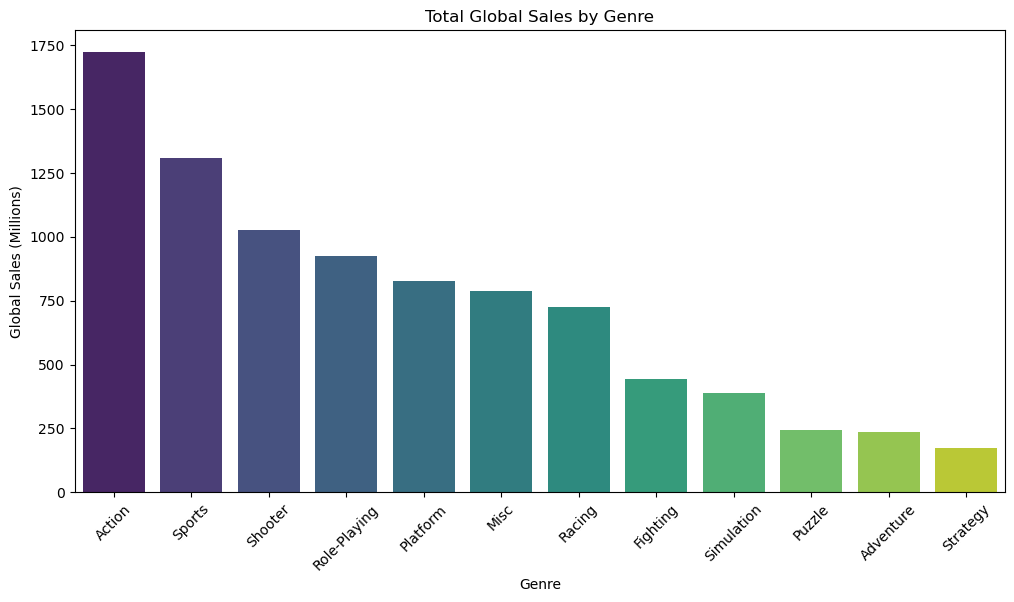

In [15]:
##Plotting the total global sales for each genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

Game sales per region in millions:
NA_Sales: 4327.65
EU_Sales: 2406.69
JP_Sales: 1284.27
Other_Sales: 788.91


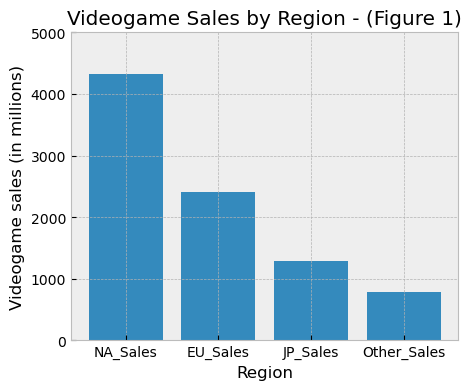

In [16]:
##Set plotting style
plt.style.use('bmh')

##Subset DataFrame to include only the number of sales per region, then print the totals per region
games_region_total_sales = games_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

print('Game sales per region in millions:')
for lab, row in games_region_total_sales.items():
    print(f'{lab}: {row:.2f}')
  
##Plot the sales per region in a bar graph for a graphic comparative analysis
x_labels = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Set figure size
plt.figure(figsize=(5, 4))

##Set labels
plt.title('Videogame Sales by Region - (Figure 1)')
plt.ylabel('Videogame sales (in millions)')
plt.xlabel('Region')

##Set y-range
plt.ylim(0, 5000)

##Create a barplot of total videogame sales by Region
plt.bar(x_labels, games_region_total_sales)
plt.show()

In [17]:
##Identify how many game titles belong to each platform
titles_per_platforms = games_df[['Platform']].value_counts().rename('Number of Game Titles Releases')
print(titles_per_platforms.head())

##Identify the total global sales per platform
games_sales_per_platform_df = games_df.groupby('Platform')[['Platform','Global_Sales']].sum('Global_Sales').sort_values(by='Global_Sales', ascending=False)
games_sales_per_platform_df.rename(columns={'Global_Sales': 'Global Videogame Sales (in Millions)'}, inplace=True)

##Merge the Pandas Series with the DataFrame
games_platform_sales_and_releases_df = games_sales_per_platform_df.merge(titles_per_platforms, how='left', on='Platform')
games_platform_sales_and_releases_df.head(31)

Platform
DS          2131
PS2         2127
PS3         1304
Wii         1290
X360        1234
Name: Number of Game Titles Releases, dtype: int64


,Global Videogame Sales (in Millions),Number of Game Titles Releases
Platform,,
PS2,1233.46,2127
X360,969.60,1234
PS3,949.35,1304
Wii,909.81,1290
DS,818.91,2131
PS,727.39,1189
GBA,305.62,786
PSP,291.71,1197
PS4,278.10,336


### Sales compearison by platform

In [18]:
comp_platform = games_df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [19]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

In [20]:
##comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,80.78
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.03
3,DC,NA_Sales,5.43
4,DS,NA_Sales,388.53


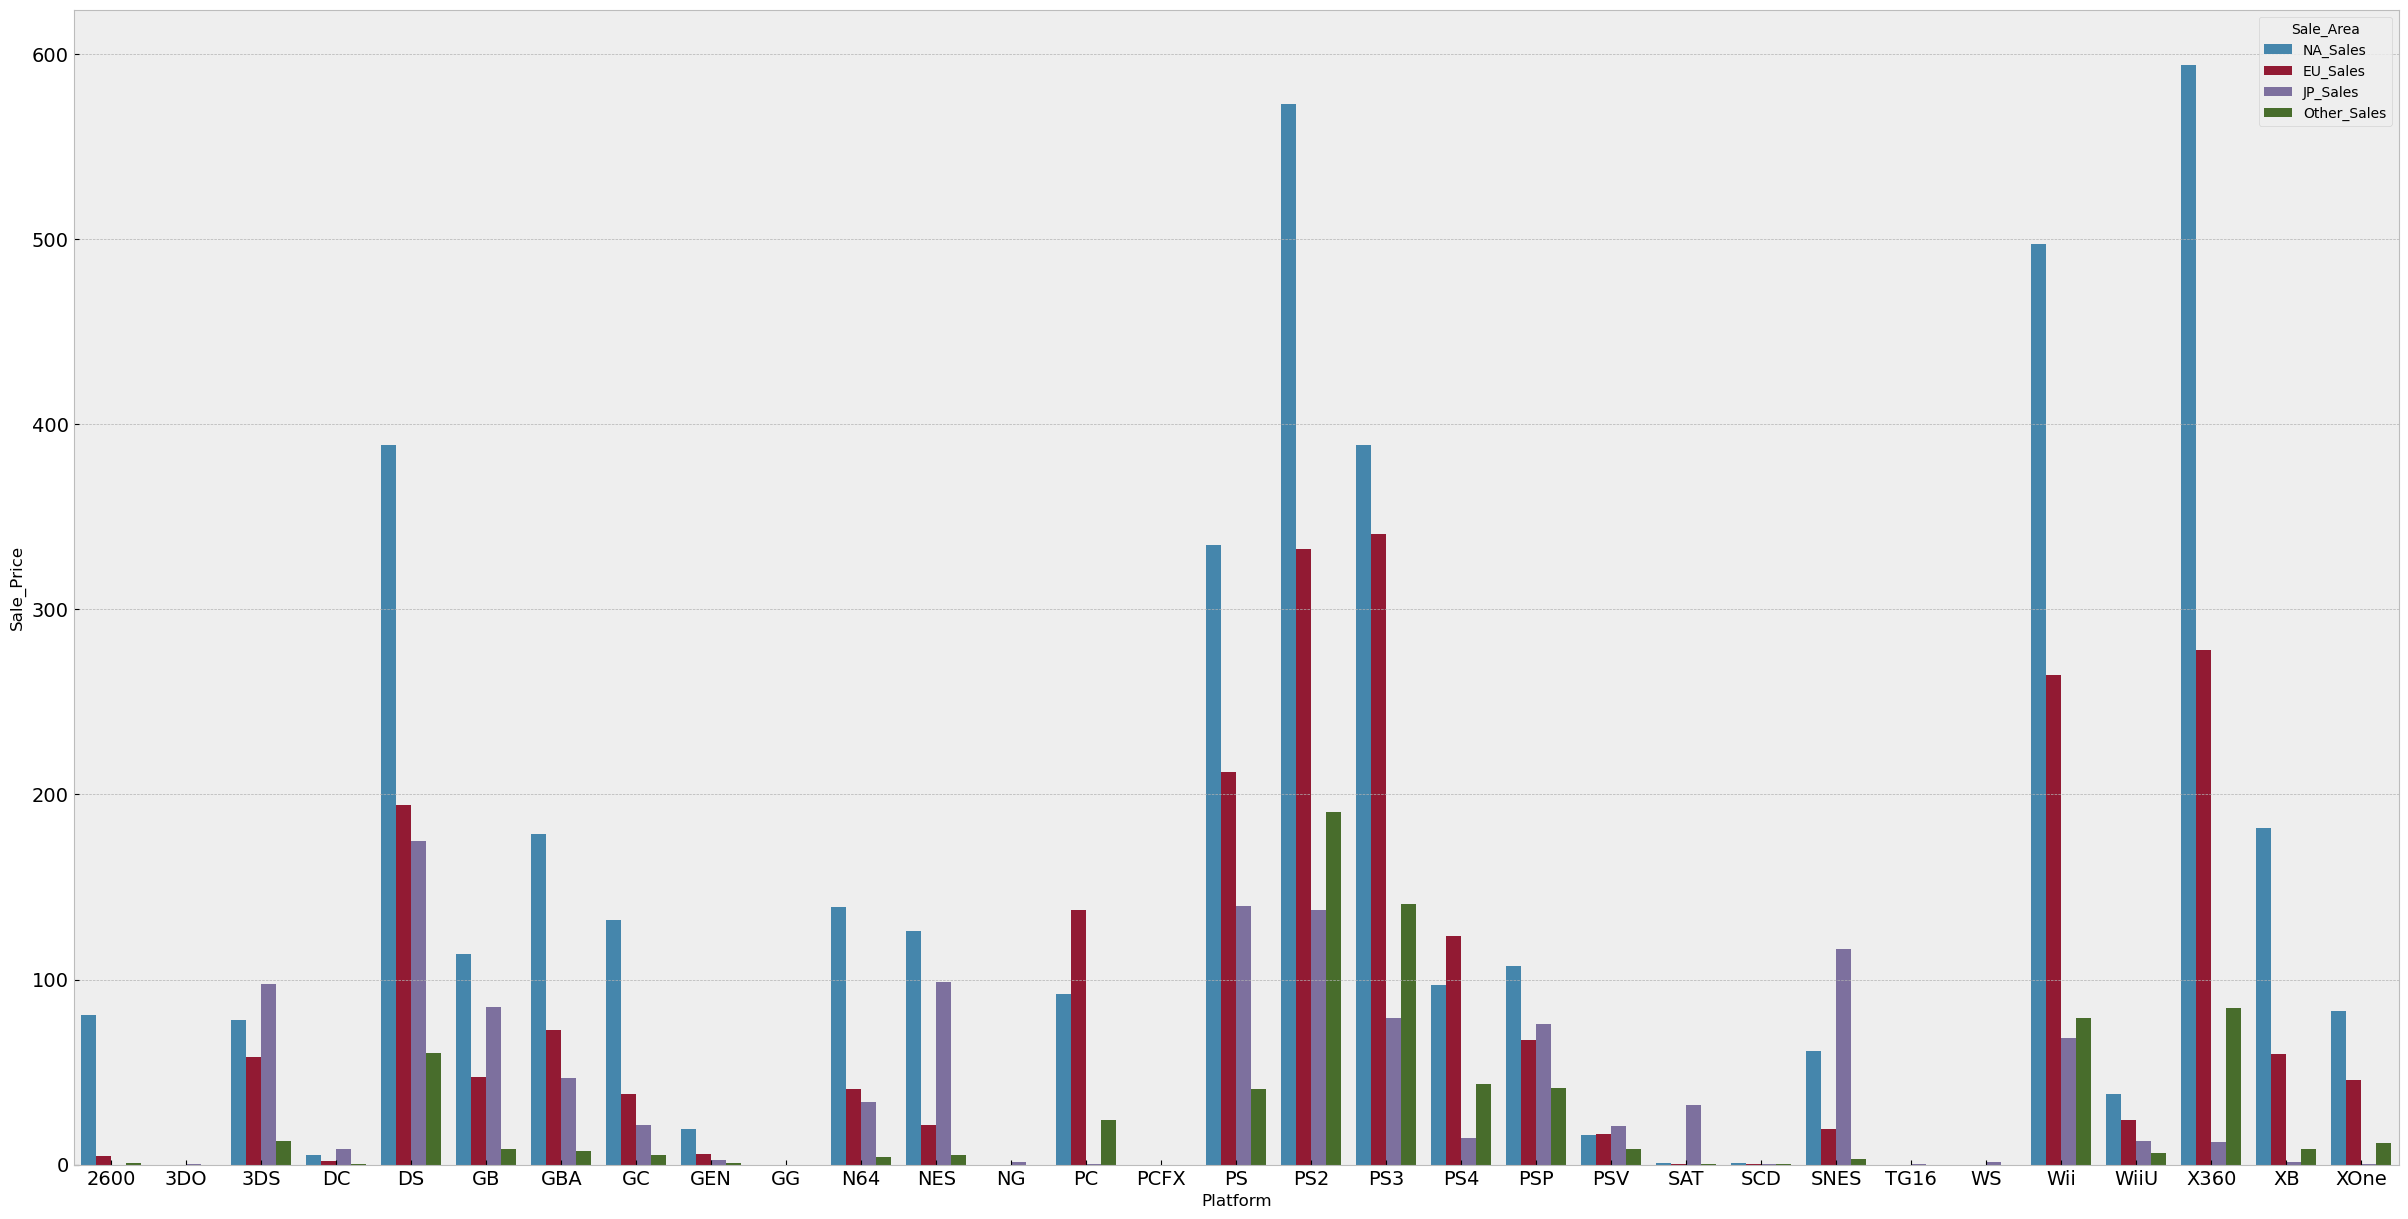

In [21]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [22]:
##top_publisher
top_publisher = games_df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Namco Bandai Games'),
  Text(3, 0, 'Ubisoft'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Square Enix'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

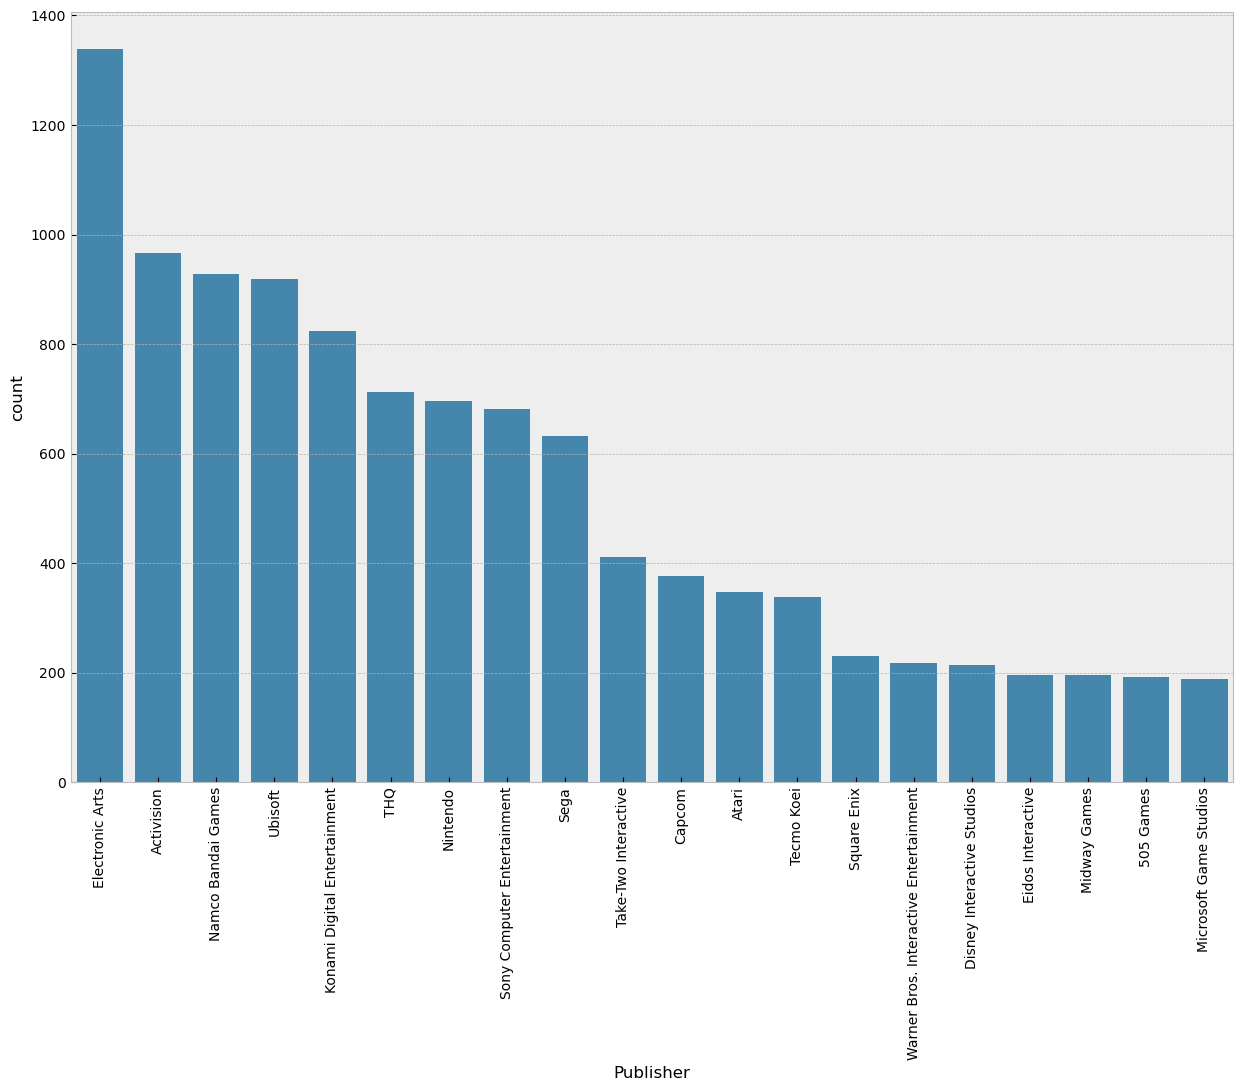

In [23]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=games_df, order = games_df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)